## A1. Find the first derivative of your speech signal with finite difference method. Listen to the firstderivative signal and the original speech signal.

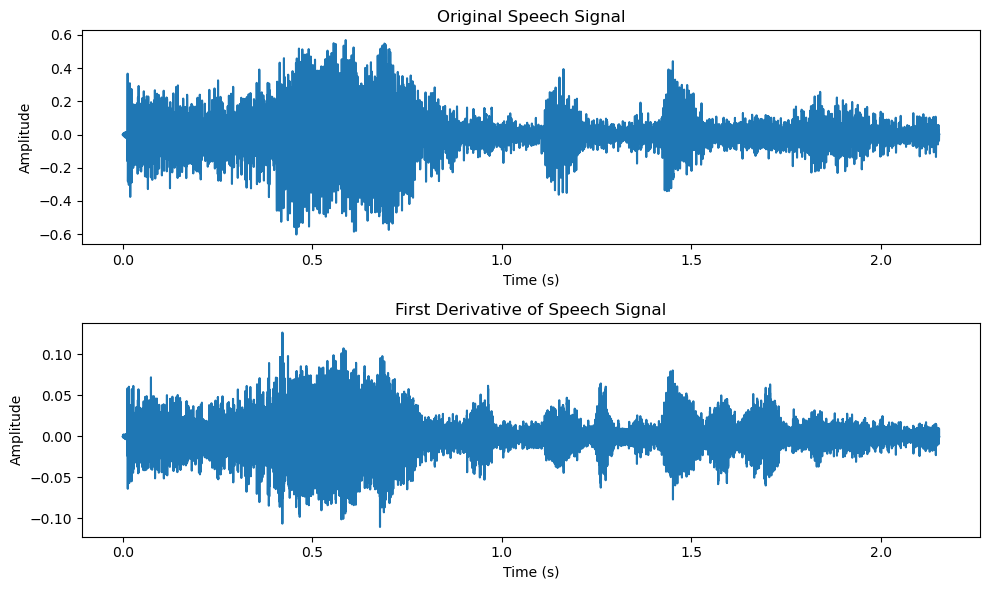

Playing original speech signal...


In [10]:
import numpy as np
import scipy.signal as signal
import librosa

import matplotlib.pyplot as plt
from IPython.display import Audio

speech_signal, sample_rate = librosa.load('speeech.wav')

derivative_signal = np.diff(speech_signal)


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(speech_signal)) / sample_rate, speech_signal)
plt.title('Original Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(derivative_signal)) / sample_rate, derivative_signal)
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("Playing original speech signal...")
Audio(speech_signal, rate=sample_rate)



In [11]:
print("Playing first derivative of speech signal...")
Audio(derivative_signal, rate=sample_rate)


Playing first derivative of speech signal...


## A2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

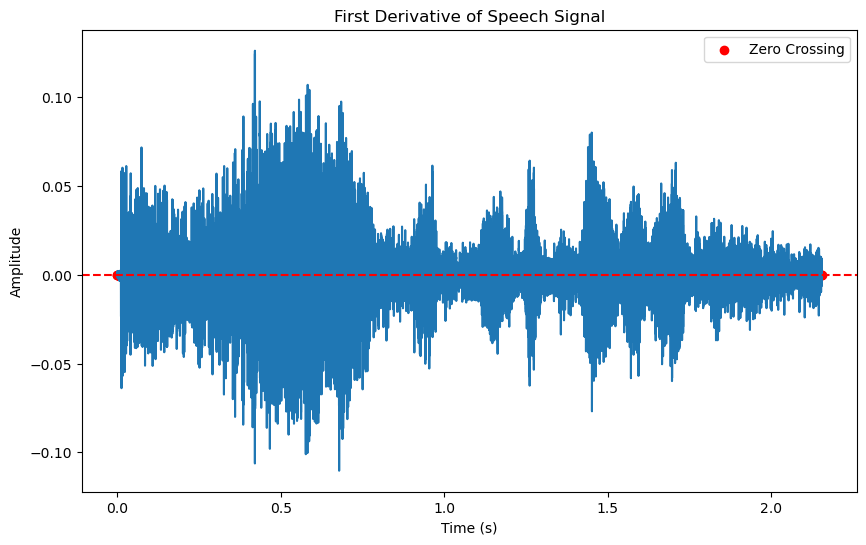

Average length between two consecutive zero crossings for speech regions: 0.0007101237119320303 seconds
Average length between two consecutive zero crossings for silence regions: 0.0001020540050064229 seconds
Playing original speech signal...


In [16]:
zero_crossings = np.where(np.diff(np.sign(derivative_signal)))[0]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(derivative_signal)) / sample_rate, derivative_signal)
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='r', linestyle='--')  
plt.scatter(zero_crossings / sample_rate, np.zeros_like(zero_crossings), color='red', label='Zero Crossing')
plt.legend()
plt.show()

consecutive_zero_crossing_diffs = np.diff(zero_crossings) / sample_rate

speech_lengths = consecutive_zero_crossing_diffs[consecutive_zero_crossing_diffs > 0.0003]  # Threshold for silence detection
silence_lengths = consecutive_zero_crossing_diffs[consecutive_zero_crossing_diffs <= 0.0003]

print("Average length between two consecutive zero crossings for speech regions:", np.mean(speech_lengths), "seconds")
print("Average length between two consecutive zero crossings for silence regions:", np.mean(silence_lengths), "seconds")

print("Playing original speech signal...")
Audio(speech_signal, rate=sample_rate)


## A3. Speak 5 of your favorite words. Observe the length of the speech signals. Compare the lengths ofyour spoken words with those of your project team-mate.

In [33]:
import numpy as np
import scipy.io.wavfile as wav
import librosa

def split_speech_into_words(signal, threshold):
    crossings = np.where(np.abs(signal) > threshold)[0]
    words = np.split(signal, crossings)
    words = [word for word in words if len(word) > 1000]  # Adjust threshold as needed
    return words

fs_you, speech_you = wav.read('Lokesh.wav')

fs_teammate, speech_teammate = wav.read('Akhil.wav')

threshold = 1000  

words_you = split_speech_into_words(speech_you, threshold)
words_teammate = split_speech_into_words(speech_teammate, threshold)

durations_you = [len(word) / fs_you for word in words_you]
durations_teammate = [len(word) / fs_teammate for word in words_teammate]

print("Your spoken words durations (in seconds):", durations_you)
print("Team mate's spoken words durations (in seconds):", durations_teammate)


Your spoken words durations (in seconds): [0.48954166666666665, 0.1876875, 0.024416666666666666, 0.0244375, 0.06779166666666667, 0.46010416666666665, 0.10633333333333334, 0.15985416666666666, 0.6100833333333333, 1.4899583333333333, 0.20916666666666667]
Team mate's spoken words durations (in seconds): [1.56475, 0.07333333333333333, 0.06641666666666667, 0.14854166666666666, 0.065625, 0.2445625, 0.0775625, 0.17841666666666667, 0.024875, 0.17983333333333335, 0.238125, 0.06483333333333334, 0.10045833333333333, 0.06941666666666667, 0.02675, 0.025125, 0.0951875, 0.02660416666666667, 0.42275]


In [36]:
print("My Signal:")
Audio(speech_you, rate=fs_you)


My Signal:


## Q-4 A4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”. Record two signals – one with making the statement while other with asking question. Study the two signals and compare them.

In [19]:
import numpy as np
import scipy.signal as signal
import librosa

import matplotlib.pyplot as plt
from IPython.display import Audio

speech_signal1, sample_rate1 = librosa.load('q41.wav')
speech_signal2, sample_rate2 = librosa.load('q42.wav')



In [39]:
print("Question Signal:")
print("Length is:" ,len(speech_signal1))
Audio(speech_signal1, rate=sample_rate1)


Question Signal:
Length is: 146412


In [40]:
print("statement Signal:")
print("Length is:" ,len(speech_signal2))
Audio(speech_signal2, rate=sample_rate2)


statement Signal:
Length is: 150381


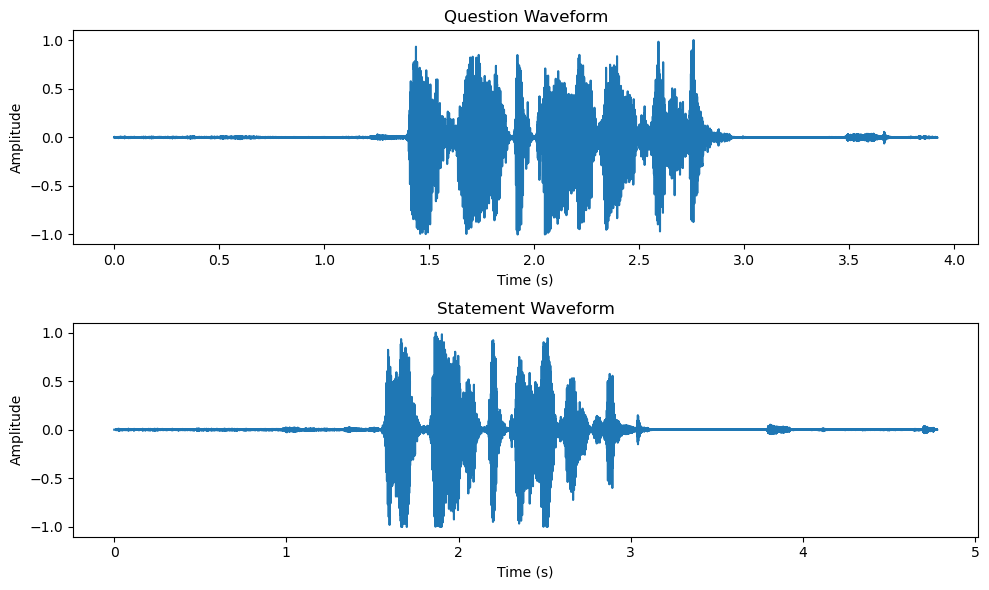

In [24]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(speech_signal1)) / sample_rate1,speech_signal1 )
plt.title('Question Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(speech_signal2)) /sample_rate2 ,speech_signal2 )
plt.title('Statement Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

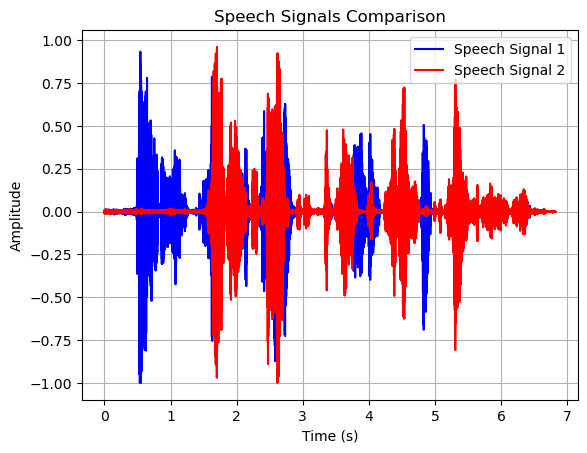

In [42]:
speech_signal1 = speech_signal1.astype(np.float32) / np.max(np.abs(speech_signal1))
speech_signal2 = speech_signal2.astype(np.float32) / np.max(np.abs(speech_signal2))

time1 = np.linspace(0, len(speech_signal1) / sample_rate1, len(speech_signal1))
time2 = np.linspace(0, len(speech_signal2) / sample_rate2, len(speech_signal2))

plt.plot(time1, speech_signal1, color='blue', label='Speech Signal 1')
plt.plot(time2, speech_signal2, color='red', label='Speech Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech Signals Comparison')
plt.legend()
plt.grid(True)
plt.show()